In [1]:
import nltk
import os
import re
import string
from IPython.display import Image
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import gensim

In [2]:
input_directory = "1999 Hepth CTM LDA Topics fulltexts/1999 Hepth CTM LDA Topics fulltexts/CTMLDA";

In [3]:
input_docs_id = os.listdir("1999 Hepth CTM LDA Topics fulltexts/1999 Hepth CTM LDA Topics fulltexts/CTMLDA")

In [4]:
for doc_id in input_docs_id:
    if not doc_id.endswith(".txt"):
        input_docs_id.remove(doc_id)

In [5]:
input_docs_content = []

In [6]:
for doc_id in input_docs_id[:100]:
    with open(input_directory + "/" + doc_id,"r") as f:
        input_docs_content.append(f.read())

In [7]:
len(input_docs_content)

100

## Pre Processing

### Text lowercase conversion

In [8]:
for i in range(len(input_docs_content)):
    input_docs_content[i] = input_docs_content[i].lower()

### Remove numbers

In [9]:
for i in range(len(input_docs_content)):
    input_docs_content[i] = re.sub(r'\d+', '', input_docs_content[i])

### Remove Punctuation

In [10]:
translator = str.maketrans('', '', string.punctuation)
for i in range(len(input_docs_content)):
    input_docs_content[i] = input_docs_content[i].translate(translator)

### Remove WhiteSpace

In [11]:
for i in range(len(input_docs_content)):
    input_docs_content[i] = " ".join(input_docs_content[i].split())

### Tokenization


In [12]:
feature_terms = []
for i in range(len(input_docs_content)):
    feature_terms.append(nltk.tokenize.word_tokenize(input_docs_content[i]))

### Stop Word removal

In [13]:
stop_words = set(nltk.corpus.stopwords.words("english"))

for i in range(len(feature_terms)):
    feature_terms[i] = [word for word in feature_terms[i] if word not in stop_words]

### remove single and double letter words

In [14]:
filtered_feature_term=[]

for feature_term in feature_terms:
    temp_list = []
    for feature in feature_term:
        if not(len(feature)==1 or len(feature)==2):
            temp_list.append(feature)
    filtered_feature_term.append(temp_list)

In [15]:
feature_terms = filtered_feature_term

In [16]:
pd.DataFrame(feature_terms)

,0,1,2,3,4,5,6,7,8,9,...,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491
0,yitp,hepth,january,string,junctions,duals,heterotic,string,theory,yosuke,...,None,None,None,None,None,None,None,None,None,None
1,yitp,hepth,january,string,junctions,duals,heterotic,string,theory,yosuke,...,None,None,None,None,None,None,None,None,None,None
2,yitp,hepth,january,string,junctions,duals,heterotic,string,theory,yosuke,...,None,None,None,None,None,None,None,None,None,None
3,yitp,hepth,january,string,junctions,duals,heterotic,string,theory,yosuke,...,None,None,None,None,None,None,None,None,None,None
4,ctp,tamu,uprt,january,hepth,exact,absorption,probability,extremal,sixdimensional,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,nambugoldstone,mechanism,realtime,thermal,eld,theory,department,physics,graduate,school,...,None,None,None,None,None,None,None,None,None,None
96,nambugoldstone,mechanism,realtime,thermal,eld,theory,department,physics,graduate,school,...,None,None,None,None,None,None,None,None,None,None
97,landau,institute,preprint,topological,interpretation,quantum,numbers,sabulgadaev,landau,itp,...,None,None,None,None,None,None,None,None,None,None
98,landau,institute,preprint,topological,interpretation,quantum,numbers,sabulgadaev,landau,itp,...,None,None,None,None,None,None,None,None,None,None


### Stemming

In [17]:
# filtered_feature_term=[]

# stemmer = nltk.stem.porter.PorterStemmer()

# for feature_term in feature_terms:
#     filtered_feature_term.append([stemmer.stem(word) for word in feature_term])

## A. TERM CORRELATION BASED ON CO-OCCURRENCE

In [18]:
unique_words = set()

In [19]:
for feature_term in feature_terms:
    for feature in feature_term:
        unique_words.add(feature)

In [20]:
len(unique_words)

10968

In [21]:
unique_words = list(unique_words)

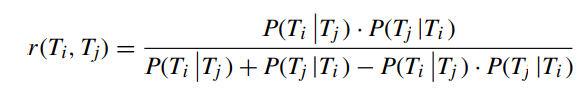

In [22]:
Image(filename='images/R_formula.png') 

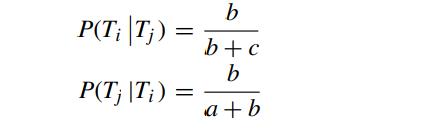

In [23]:
Image(filename='images/R_formula_1.png') 

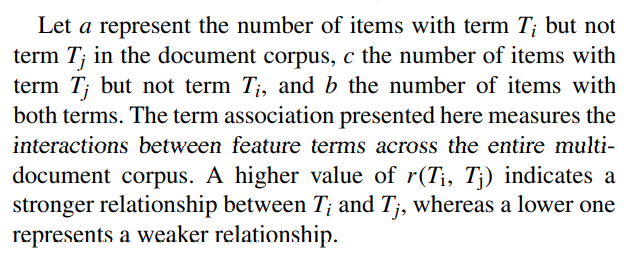

In [24]:
Image(filename='images/R_formula_2.png') 

In [25]:
R_matrix=[]
for T_i in unique_words[:50]:
    temp_list = []
    for T_j in unique_words[:50]:
        if T_i == T_j:
            temp_list.append(0)
            continue
        a=0
        b=0
        c=0
        for feature_term in feature_terms:
            if (T_i in feature_term) and not (T_j in feature_term):
                a=a+1
            if (T_j in feature_term) and not (T_i in feature_term):
                c=c+1
            if (T_j in feature_term) and (T_i in feature_term):
                b=b+1
        try:
            ptitj = (b)/(b+c)
        except ZeroDivisionError:
            ptitj = 0
        try:
            ptjti = (b)/(a+b)
        except ZeroDivisionError:
            ptjti = 0
        try:
            rtitj = (ptitj * ptjti) / ((ptitj + ptjti) - (ptitj * ptjti))
        except ZeroDivisionError:
            rtitj = 0
        temp_list.append(rtitj)
    R_matrix.append(temp_list)
        

In [26]:
pd.DataFrame(R_matrix,columns = unique_words[:50]).head()

,oberhettinger,qihp,calabi,carlip,bmb,completion,paban,stochasticity,hanany,primordial,...,mario,introduce,nian,higgsinos,supersym,aijk,musgrave,becames,intimately,haag
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1,0.0,0.0,0.0,0.0,0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.040816,0.5,0.0,0.0,0.0,0.0,0.0,0.00,0.000
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.038462,0.0,0.0,0.0,0.4,0.0,0.0,0.25,0.000
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.061224,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.375
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000


## B. SEMANTIC GRAPH CONSTRUCTION

In [27]:
G_adj_matrix = []
W=0.02

In [28]:
for i in range(len(R_matrix)):
    temp_list=[]
    for j in range(len(R_matrix)):
        if R_matrix[i][j]>W:
            temp_list.append(1)
        else:
            temp_list.append(0)
    G_adj_matrix.append(temp_list)

In [29]:
G = nx.DiGraph(pd.DataFrame(G_adj_matrix).values)

In [30]:
node_labels = {}
for i in range(50):
    node_labels[i]=unique_words[i]

C:\Users\karthikn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\karthikn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


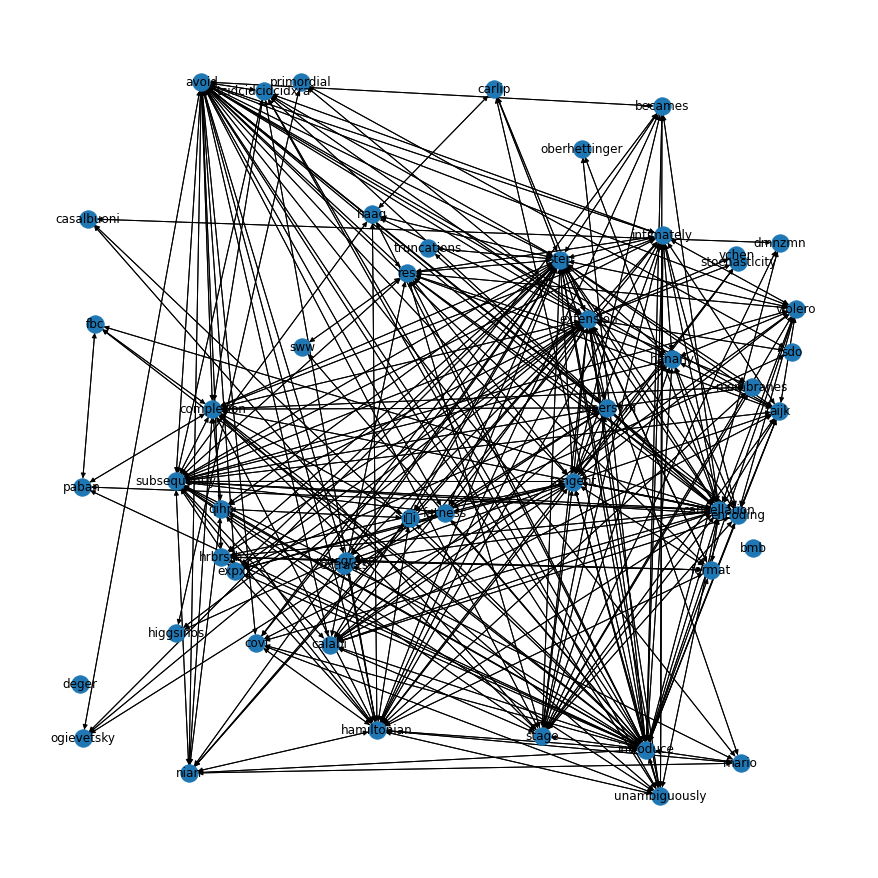

In [31]:
plt.figure(3,figsize=(12,12)) 
nx.draw_random(G,labels = node_labels)
plt.show()

### Max frequency Word

In [32]:
from collections import defaultdict
freq=defaultdict(int)

for i in unique_words:
    for j in feature_terms:
        for k in j:
            if i==k:
                freq[i]+=1
                

In [33]:
max_freq=0
max_freq_word=""
for item in freq.items():
    if item[1]>max_freq:
        max_freq = item[1]
        max_freq_word = item[0]

In [34]:
max_freq_word

'theory'

## C. SEMANTIC GRAPH REFINEMENT

### 1.  GENERATING THE CONTEXTUAL RELATIONSHIPS

In [35]:
model = gensim.models.Word2Vec(feature_terms, min_count = 1, size = 100,window = 5, sg = 1)

In [36]:
C_matrix=[]
for i in range(50):
    temp_list = []
    for j in range(50):
        if i==j:
            temp_list.append(0)
        else:
            temp_list.append(model.wv.similarity(unique_words[i],unique_words[j]))
    C_matrix.append(temp_list)

In [37]:
pd.DataFrame(C_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.934238,0.716643,0.955836,0.869547,0.925836,0.947943,0.907051,0.980579,0.863579,...,0.971867,0.505007,0.804029,0.946921,0.944911,0.811666,0.978841,0.865384,0.934479,0.830417
1,0.934238,0.000000,0.830270,0.835414,0.960021,0.938191,0.805763,0.943031,0.943388,0.785047,...,0.953889,0.721790,0.903311,0.984308,0.962042,0.900497,0.939375,0.953977,0.954101,0.765340
2,0.716643,0.830270,0.000000,0.645628,0.737263,0.779398,0.600628,0.769088,0.691117,0.576651,...,0.721967,0.614235,0.643699,0.768430,0.839792,0.677362,0.707907,0.768291,0.794980,0.657992
3,0.955836,0.835414,0.645628,0.000000,0.754621,0.892068,0.966949,0.849985,0.928077,0.917439,...,0.921182,0.329338,0.664834,0.858172,0.887485,0.675649,0.938433,0.743745,0.862277,0.882079
4,0.869547,0.960021,0.737263,0.754621,0.000000,0.897245,0.712290,0.942818,0.900857,0.743552,...,0.910405,0.803061,0.949613,0.968204,0.909752,0.925486,0.888218,0.957340,0.903949,0.708838


### 2.  REFINING THE SEMANTIC GRAPH

In [38]:
k = 0.5

for i in range(len(R_matrix)):
    for j in range(len(R_matrix)):
        if C_matrix[i][j]<k:
            R_matrix[i][j]=0
            G_adj_matrix[i][j]=0

In [39]:
G = nx.DiGraph(pd.DataFrame(G_adj_matrix).values)

C:\Users\karthikn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\karthikn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


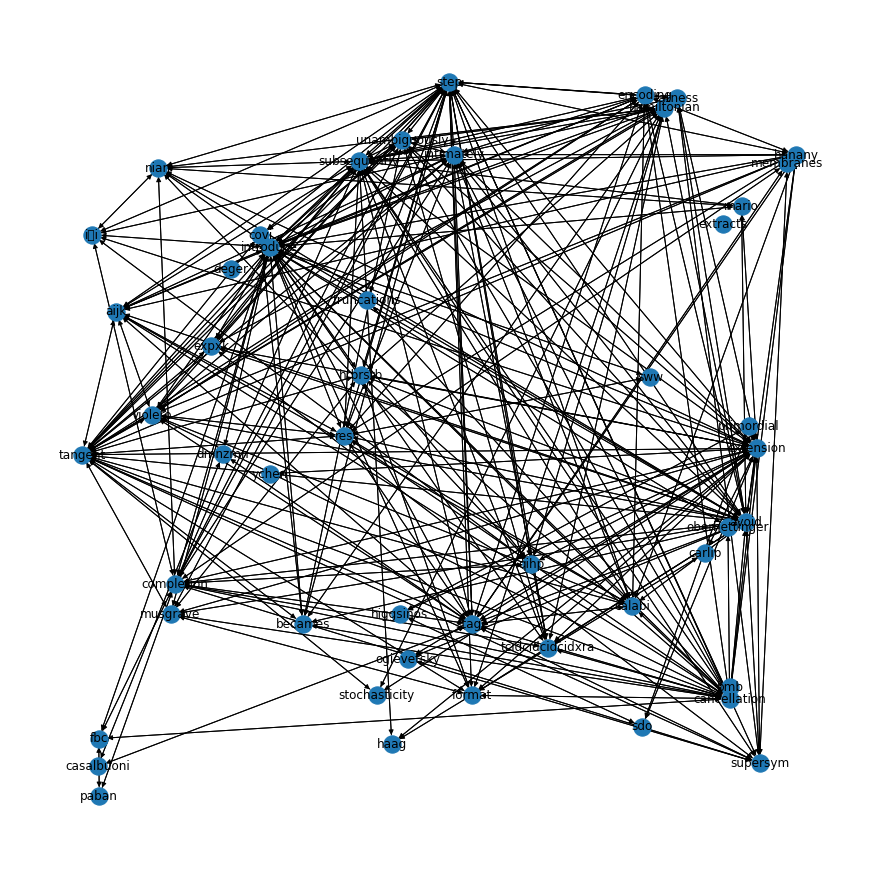

In [40]:
plt.figure(3,figsize=(12,12)) 
nx.draw_random(G,labels = node_labels)
plt.show()

## TOPIC MINING FROM THE REFINED SEMANTIC GRAPH

### A. SUBGRAPH SEGMENTATION

In [41]:
W_matrix=[]

In [42]:
for i in range(len(R_matrix)):
    temp_list=[]
    for j in range(len(R_matrix)):
        temp_list.append(0)
    W_matrix.append(temp_list)

for i in range(len(R_matrix)):
    for j in range(len(R_matrix)):
        if W_matrix[i][j]!=0:
            continue
        W_matrix[i][j]=R_matrix[i][j]
        W_matrix[j][i]=R_matrix[i][j]

In [43]:
D_matrix=[]

In [44]:
row_sum=[]
for i in range(len(W_matrix)):
    cur_sum=0
    for j in range(len(W_matrix)):
        cur_sum=cur_sum + W_matrix[i][j]
    row_sum.append(cur_sum)

for i in range(len(W_matrix)):
    temp_list=[]
    for j in range(len(W_matrix)):
        if i==j:
            temp_list.append(row_sum[i])
        else:
            temp_list.append(0)
    D_matrix.append(temp_list)

In [45]:
L_matrix=[]

In [46]:
for i in range(len(W_matrix)):
    temp_list=[]
    for j in range(len(W_matrix)):
        temp_list.append(D_matrix[i][j]-W_matrix[i][j])
    L_matrix.append(temp_list)

In [ ]:
L_matrix